# Étude de cas 2
### Outils et méthodologies de Résolution des problèmes partie 2
réalisé par:
* Mourad Izem
* Mehdi Hayani Mechkouri

(Questions 11-14)
#### Rappel de la situation

NOLTACED est une chaîne de trois
magasins qui livre des produits
agroalimentaires frais. Après une période
de croissance rapide, NOLTACED a vu son
chiffre d'affaires baisser pendant six mois.
Le comité de direction a décidé de former
une équipe composée des directeurs des
magasins, de personnel de production et
de livreurs pour essayer de découvrir ce
qui se passait et de générer un plan
d'action pour redresser la situation.
L’équipe a suivi un standard global de
résolution des problèmes.

In [1]:
# Importation des dépendances 
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt 

## Travail effectué
1. Énumération des causes
2. Étude de l'effet de la distance sur le délai de livraison
3. Importance des causes
4. Proposition de solutions
5. Importance des solutions

## 1 - Énumération des causes

A. Camions de livraison en panne <br>
B. Camions insuffisants <br>
C- Les machines de production insuffisantes <br>
D-Le retard de la matière première et ingrédients <br>
E- Le personnel chargé de la production est incompétent <br>
F- Mauvaise communication entre les services <br>
G- Cadence de production des opérateurs est faible <br>
H- Planning de livraison n’est pas bien conçu <br>
I- Espace de stockage dans l'entrepôt insuffisant <br>
J- Embouteillage <br>
K- Les longues distances <br>

## 2 - Étude de l'effet de la distance sur le délai de livraison

### 2.1 saisie des informations

In [2]:
distance = np.array([50, 100, 100, 150, 200, 250, 250, 300])
delai = np.array([4, 2, 6, 3, 4, 2, 6, 3.5])
distance_delai = pd.DataFrame({"distance": distance, "delai": delai})
distance_delai.transpose()

,0,1,2,3,4,5,6,7
distance,50.0,100.0,100.0,150.0,200.0,250.0,250.0,300.0
delai,4.0,2.0,6.0,3.0,4.0,2.0,6.0,3.5


Traçage de la droite de régression

In [3]:
reg = LinearRegression().fit(distance.reshape(-1,1), delai.reshape(-1,1))
lin_dist = np.arange(30,400,10)
lin_pred = reg.predict(lin_dist.reshape(-1,1)).reshape(-1)
reg_ligne = pd.DataFrame({"Distance":lin_dist, "Temps":lin_pred}, )

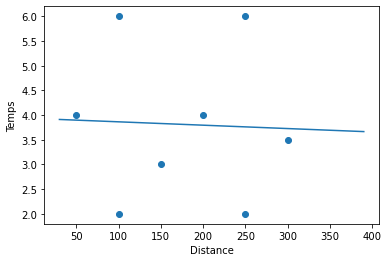

In [4]:
plt.scatter(distance, delai)
sns.lineplot(data=reg_ligne, x="Distance", y="Temps")
plt.show()

### 2.2 Remarque

D’un premier abord on peut remarquer que la distance n’est pas corrélée avec le délai de livraison: vu que la pente de la droite de régression est très faible.
cependant ce résultat n’est pas forcément à prendre en considération, étant donné que la quantité de données n’est pas significative.


-0.038817270799289504


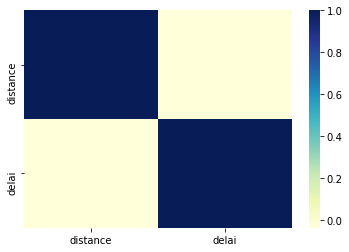

In [5]:
correlation_coef = np.corrcoef(distance, delai)
ax = sns.heatmap(distance_delai.corr(), cmap="YlGnBu")
print(correlation_coef[0][1])

### 2.3 Conclusion

Un coefficient de corrélation égal à -0.0389 vient valider notre remarque, autre pour ces données le délai de livraison et la distance ne sont pas corrélés.

## 3 - Importance des causes

Faute de données, l'équipe a décidé de classer les causes restantes sur une échelle allant de (1 à 5). Pour ordonner les votes on choisit de prendre comme critère <b>*la moyenne*, *la somme*, *le mode*.</b><br>
les résultats du vote sont les suivants:

In [6]:
data = pd.read_excel('data/causes.xlsx', index_col=0).reset_index()
data

,Causes,Mohamed,Ahmad,Ali,Fatema,Narjis,Mohsin,Min,Max,Moyenne,Sum,Mode
0,A,2,3,1,1,1,1,1,3,1.500000,9,1
1,B,0,3,1,2,3,4,0,4,2.166667,13,3
2,C,1,1,1,2,1,0,0,2,1.000000,6,1
3,D,0,1,1,1,1,1,0,1,0.833333,5,1
4,E,0,1,2,2,2,0,0,2,1.166667,7,2
5,F,4,3,4,3,1,3,1,4,3.000000,18,3
6,G,5,5,3,2,3,5,2,5,3.833333,23,5
7,H,2,3,3,3,4,1,1,4,2.666667,16,3
8,I,4,4,5,5,4,4,4,5,4.333333,26,4
9,J,3,2,0,2,1,1,0,3,1.500000,9,2


### 3.1 Visualisation des votes

In [7]:
operateurs = data.columns[1:7]
data_dict = {}
for operateur in operateurs:
    user_cnt = data[operateur].value_counts()
    counting = [0 for _ in range(6)]
    indx = data[operateur].value_counts().index
    for i in indx:
        counting[i]= user_cnt[i]
    data_dict[operateur] = counting
tendance_operateur = pd.DataFrame(data_dict)

In [8]:
choix_operateurs = tendance_operateur
choix_operateurs

,Mohamed,Ahmad,Ali,Fatema,Narjis,Mohsin
0,3,0,1,0,0,2
1,1,3,4,2,5,4
2,2,1,1,5,1,0
3,1,4,2,2,2,1
4,2,1,1,0,2,2
5,1,1,1,1,0,1


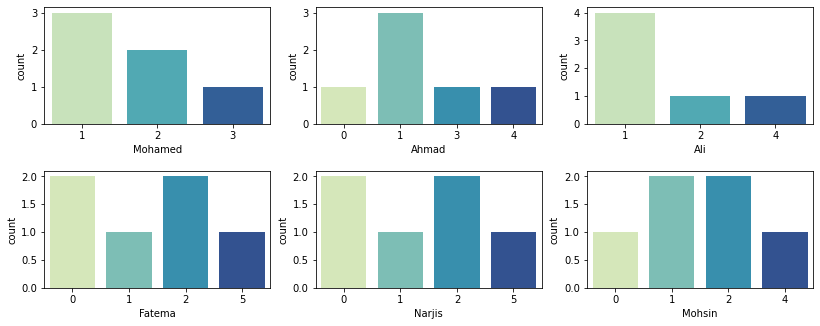

In [9]:
fig, axs = plt.subplots(2,3,figsize=(12,5))
k = 0
for i in range(2):
    for j in range(3):
        sns.countplot(x=operateurs[k], data=choix_operateurs,palette="YlGnBu", ax=axs[i][j])
        k+=1
plt.subplots_adjust(left=0.01, bottom=0.1, hspace=0.4)
plt.show()

### 3.2 Remarque

   On peut remarquer que les hommes ont moins tendance à choisir un degré sévérité important, et préfèrent remplir un de degré modéré entre 1 à 4. Les femmes quant à elles optent pour des degrés de sévérité antagonnistes 0 à 2 et 5.

### 3.3 Calcul d'importance
Les causes sont triées suivant un ordre décroissant, on attribue un score de 10 à la cause d'ordre le plus important, et on réduit le score de 1 plus l'ordre decrois.

In [10]:
### Calcul d'importance

criteres = ["Mode", "Sum", "Moyenne"]
causes = {'A':0 ,'B':0 ,'C':0 ,'D':0 ,'E':0 ,'F':0 ,'G':0 ,'H':0 ,'I':0 ,'J':0}


In [11]:
for critere in criteres:
    df1 = data[["Causes", critere]].sort_values(by=[critere], ascending=False)
    df1["Score"] = range(df1.shape[0],0, -1)
    for i in range(df1.shape[0]):
        causes[df1["Causes"].iloc[i]] += df1["Score"].iloc[i]
    

In [12]:
causes_key = list(sorted(causes, key=causes.get, reverse=False))
causes_score = [causes[key] for key in causes_key]

In [13]:
df = pd.DataFrame({"Causes": causes_key, "Score": causes_score})

In [14]:
df

,Causes,Score
0,D,3
1,C,6
2,E,11
3,J,12
4,A,13
5,B,20
6,H,20
7,F,23
8,G,28
9,I,29


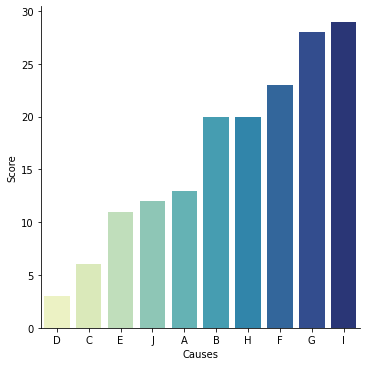

In [15]:
causes_plot = sns.catplot(data=df, x="Causes", y="Score",palette="YlGnBu", kind="bar")

### 3.4 Conclusion

- Causes graves : 
1. Espace de stockage dans l'entrepôt insuffisant
2. Cadence de production des opérateurs est faible
3. Mauvaise communication entre les services

## 4 - Proposition de solutions

a- Mettre en place une application informatique de diffusion rapide des planning des commandes<br> b- Augmenter le Stock du produit fini<br> c- Mettre en place une stratégie de
commande de la matière première<br> d- Préparer et faciliter la gestion des ingrédients par
management visuel<br> e- Utiliser des drones comme moyen de livraison<br> f- Mettre en place un
Système de Management de la Qualité<br> g- Répartir la commande en plusieurs (2 ou 3) livraison.

## 5 - Importance des solutions

In [16]:
df_solutions = pd.read_excel("data/solutions.xlsx", index_col=0)
df_solutions

,Cout,Efficacité,realisation
solution,,,
A,7,6,7
B,6,9,7
C,7,5,7
D,1,8,4
E,10,2,8
F,5,8,7
G,4,5,9


### 5.1 Calcul d'importance

Pour pouvoir sélectionner les solutions optimales, le groupe se met d'accord sur des critères de
choix et leurs coefficients :<br>
1. coût (3).
2. efficacité (4).
3. facilité de réalisation (1).

In [17]:
coef_cout, coef_efficacite, coef_realisation = 3, 4, 1
df_solutions["Importance"] = df_solutions.Cout * coef_cout + df_solutions.Efficacité * coef_efficacite + df_solutions.realisation * coef_realisation
df_solutions

,Cout,Efficacité,realisation,Importance
solution,,,,
A,7,6,7,52
B,6,9,7,61
C,7,5,7,48
D,1,8,4,39
E,10,2,8,46
F,5,8,7,54
G,4,5,9,41


In [18]:
solutions_par_ordre_importance = df_solutions.sort_values(by=['Importance'], ascending=True)
solutions_par_ordre_importance

,Cout,Efficacité,realisation,Importance
solution,,,,
D,1,8,4,39
G,4,5,9,41
E,10,2,8,46
C,7,5,7,48
A,7,6,7,52
F,5,8,7,54
B,6,9,7,61


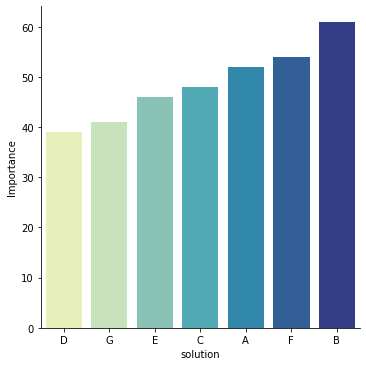

In [19]:
causes_plot = sns.catplot(data=solutions_par_ordre_importance.reset_index(), x="solution", y="Importance",palette="YlGnBu", kind="bar")

### 5.2 Conclusion

Solutions urgentes : 
1. Augmenter le Stock du produit fini
2. Mettre en place un Système de Management de la Qualité
3. Mettre en place une application informatique de diffusion rapide des planning des commande

Deux parmi ces solutions résolvent d'une façon directe les causes graves.

## 6 - Logigramme


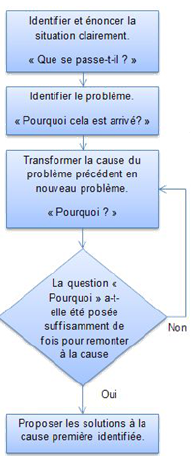

## 7 - 5 whys


l'erreur c'est au niveau du tableau 2, spécifiquement dans certaines réponses proposés qui limites le developpement de l'analyse approfondie des causes. 

Exemple : 
" il y eu des orages dans la nuit de vendredi à samedi "

contrairement au tableau 3 qui où les réponses sont plus logiques, raisonnable et en relation direct avec le problème majeur de fraîcheur des aliments. 